## Analitica Computacional para la toma de Decisiones
## Proyecto 2 - Productos bancarios
Carlos Gomez - 202111593
<br>
Jeronimo Vargas - 202113305
<br>
Juan Esteban Lopez - 202021417
<br>

In [ ]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from ydata_profiling import ProfileReport # type: ignore
%matplotlib inline

# Load the data
dataBank = pd.read_csv('bank-full.csv', sep=';')   
data = pd.read_csv('bank-full-clean.csv', sep=',')
data.head()

age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   previous  ...  marital_married  marital_single  education_primary  \
0         0  ...                1               0                  0   
1         0  ...                0               1                  0   
2         0  ...                1               0                  0   
3         0  ...                1               0                  0   
4         0  ...                0               1                  0   

   education_secondary  education_tertiary  contact_cellular  contact_unknown  \
0                    0                   1                 0                1   
1                    1                   0                 0                1   
2                    1                   0                 0                1   
3                    0                   0                 0                1   
4                    0                   0                 0                1   

   poutcome_failure  poutcome_other  poutcome_success  
0                 0               0                 0  
1                 0               0                 0  
2                 0               0                 0  
3                 0               0                 0  
4                 0               0                 0  

[5 rows x 24 columns]

In [4]:
#performing profiling
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Guardar variables que solo tiene valores de 1 o 0 en una lista
binary_vars = []
for col in data.columns:
    if data[col].isin([0, 1]).all():
        binary_vars.append(col)
print(binary_vars)

['default', 'housing', 'loan', 'y', 'job_blue-collar', 'job_pink-collar', 'job_white-collar', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'contact_cellular', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success']


In [27]:
# Ver estadísticas descriptivas de las variables 
data.describe()

age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day         month      duration      campaign      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419      6.144655    258.163080      2.763841      0.580323   
std        8.322476      2.408034    257.527812      3.098021      2.303441   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%        8.000000      5.000000    103.000000      1.000000      0.000000   
50%       16.000000      6.000000    180.000000      2.000000      0.000000   
75%       21.000000      8.000000    319.000000      3.000000      0.000000   
max       31.000000     12.000000   4918.000000     63.000000    275.000000   

       ...  marital_married  marital_single  education_primary  \
count  ...     45211.000000    45211.000000       45211.000000   
mean   ...         0.601933        0.282896           0.151534   
std    ...         0.489505        0.450411           0.358572   
min    ...         0.000000        0.000000           0.000000   
25%    ...         0.000000        0.000000           0.000000   
50%    ...         1.000000        0.000000           0.000000   
75%    ...         1.000000        1.000000           0.000000   
max    ...         1.000000        1.000000           1.000000   

       education_secondary  education_tertiary  contact_cellular  \
count         45211.000000        45211.000000      45211.000000   
mean              0.513194            0.294198          0.647741   
std               0.499831            0.455687          0.477680   
min               0.000000            0.000000          0.000000   
25%               0.000000            0.000000          0.000000   
50%               1.000000            0.000000          1.000000   
75%               1.000000            1.000000          1.000000   
max               1.000000            1.000000          1.000000   

       contact_unknown  poutcome_failure  poutcome_other  poutcome_success  
count     45211.000000      45211.000000    45211.000000      45211.000000  
mean          0.287983          0.108403        0.040698          0.033421  
std           0.452828          0.310892        0.197592          0.179735  
min           0.000000          0.000000        0.000000          0.000000  
25%           0.000000          0.000000        0.000000          0.000000  
50%           0.000000          0.000000        0.000000          0.000000  
75%           1.000000          0.000000        0.000000          0.000000  
max           1.000000          1.000000        1.000000          1.000000  

[8 rows x 24 columns]

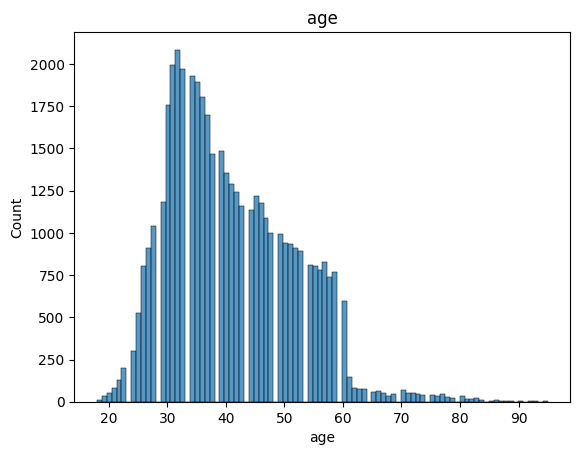

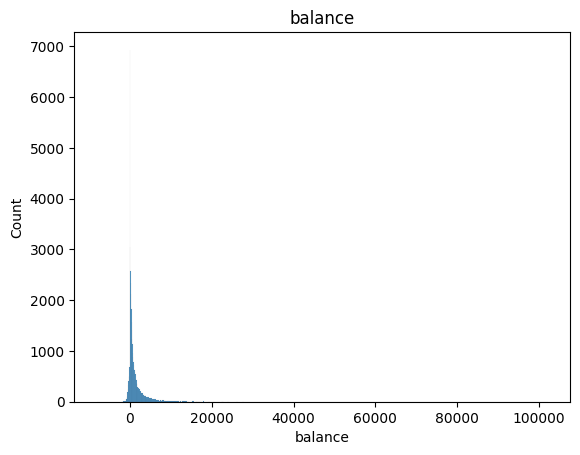

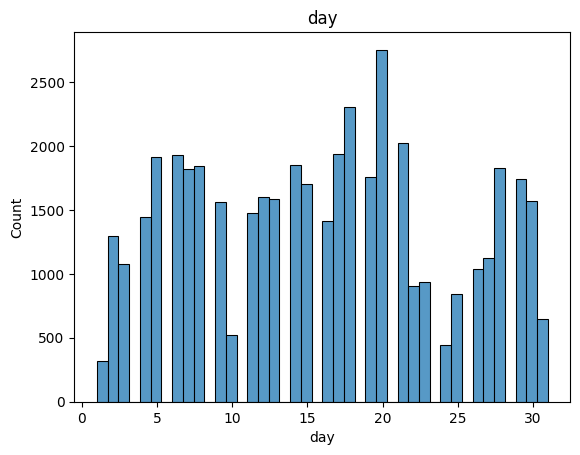

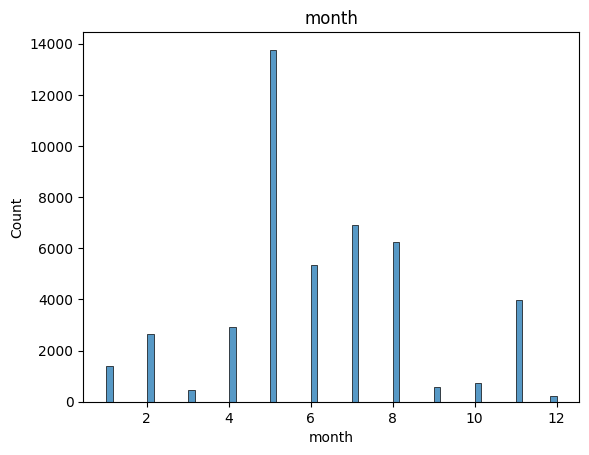

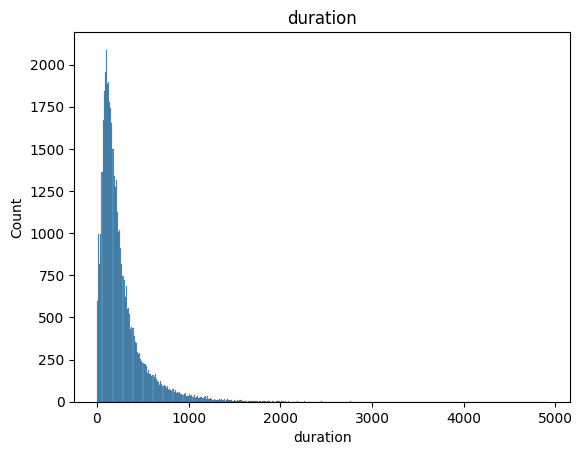

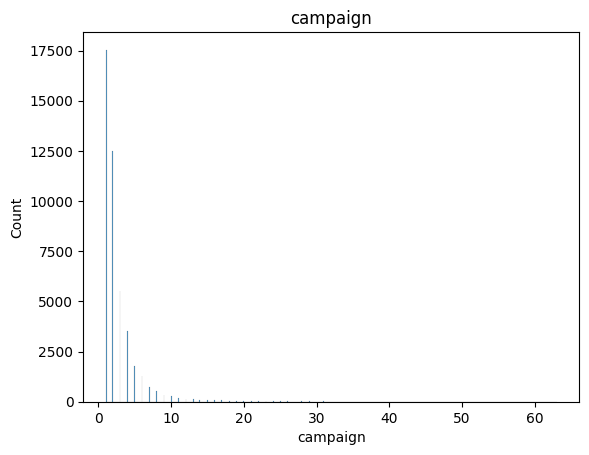

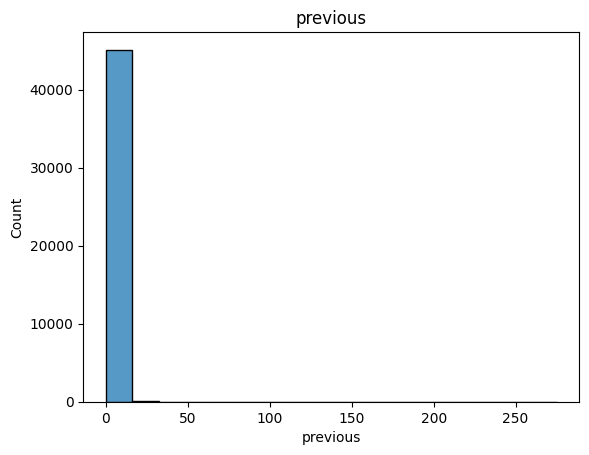

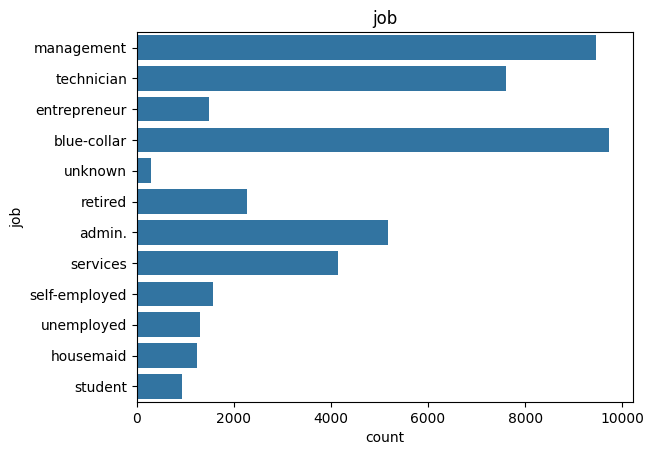

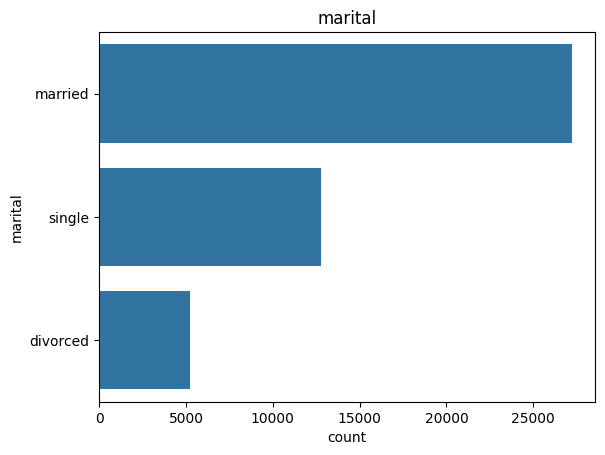

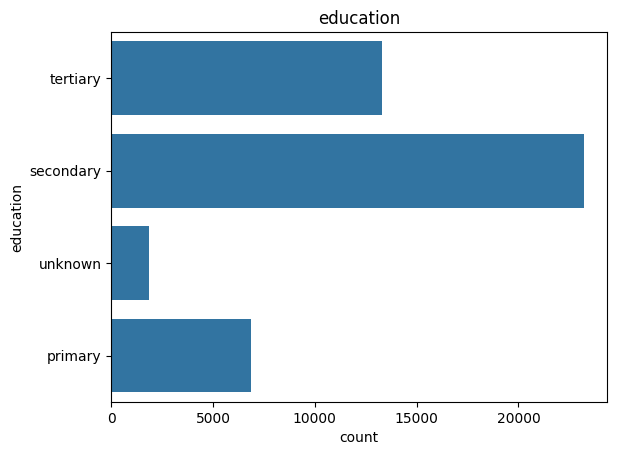

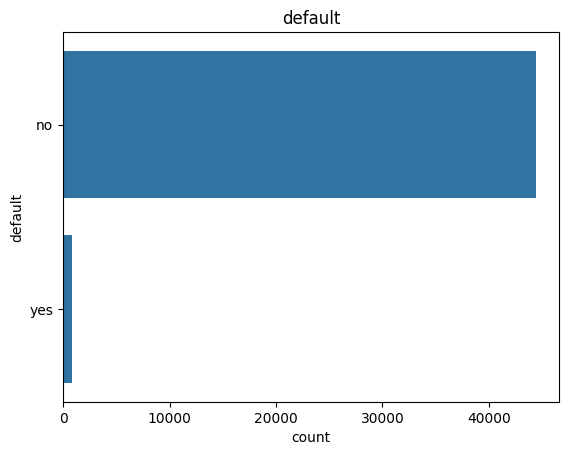

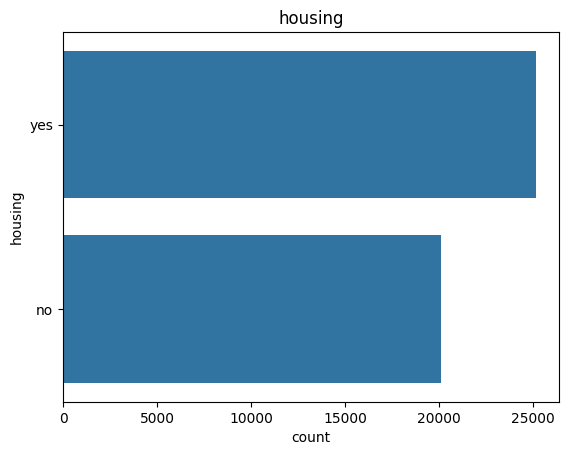

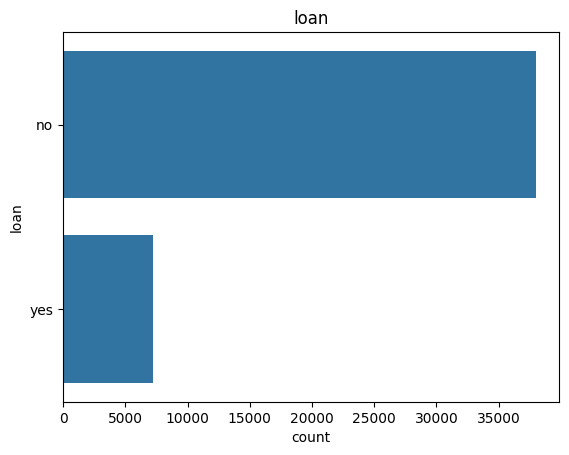

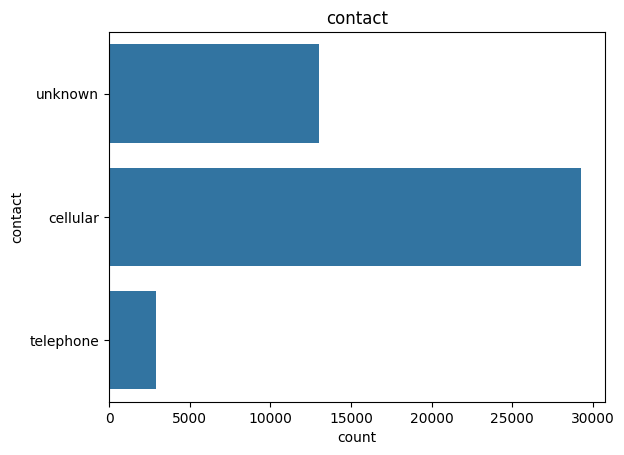

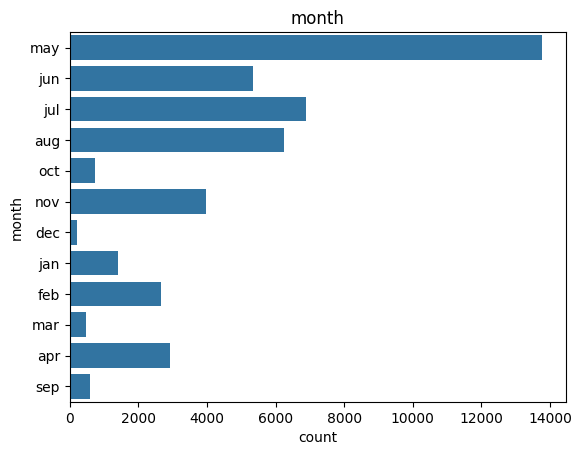

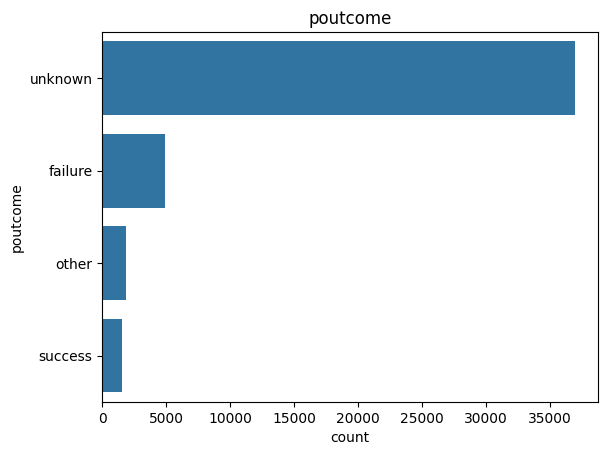

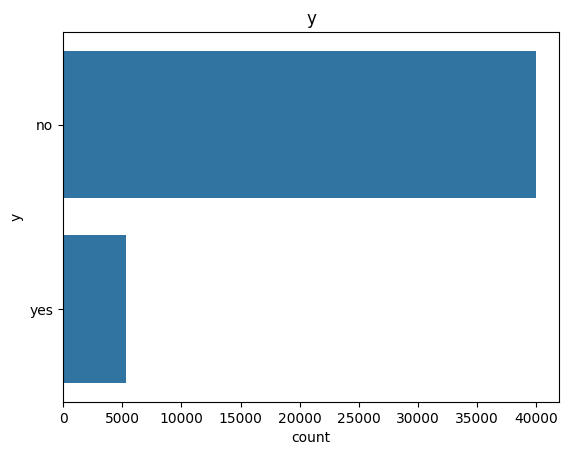

In [16]:
# Realizar Histogramas de las variables 
for col in data.columns:
    if col not in binary_vars:
        sns.histplot(data[col])
        plt.title(col)
        plt.show()

# Realizar Histogramas de las variables categoricas
for col in dataBank.columns:
    if dataBank[col].dtype == 'object':
        sns.countplot(dataBank[col])
        plt.title(col)
        plt.show()

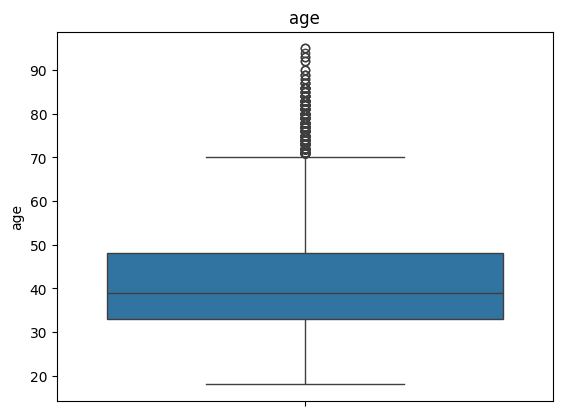

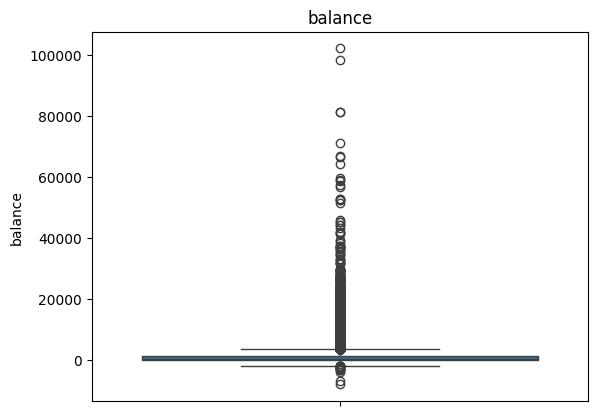

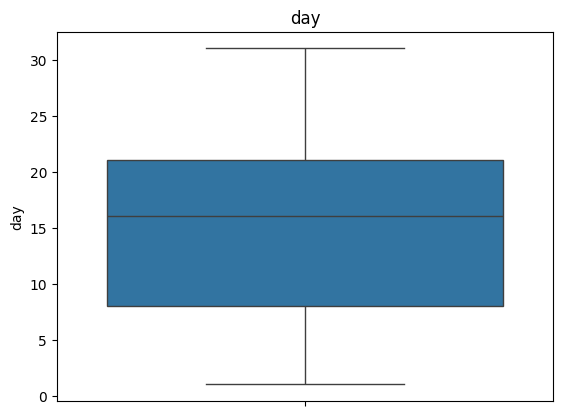

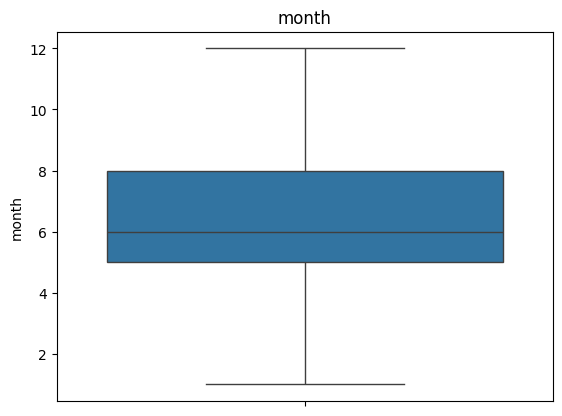

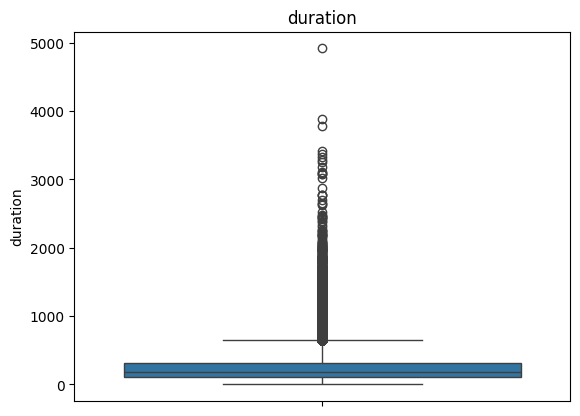

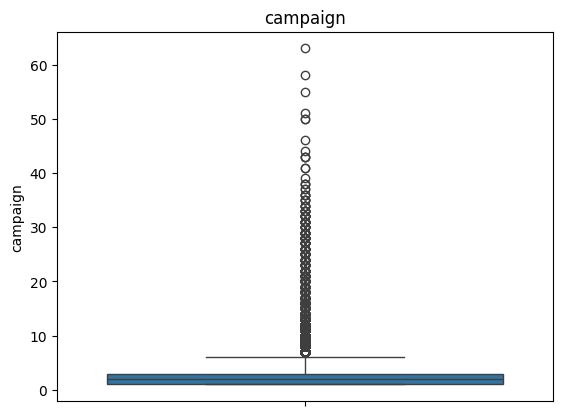

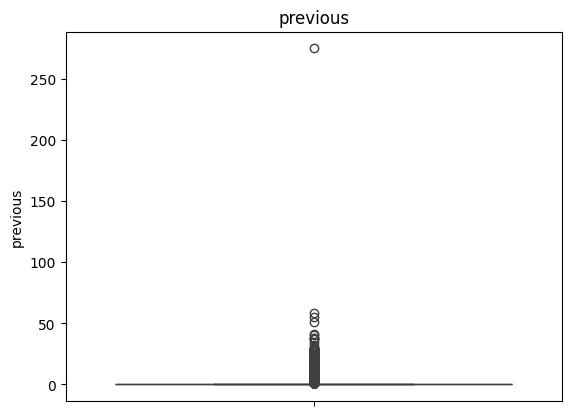

In [14]:
# Realizar boxplots de todas las variables que no sean binarias 
for i in data.columns:
    if i not in binary_vars:
        sns.boxplot(data[i])
        plt.title(i)
        plt.show()

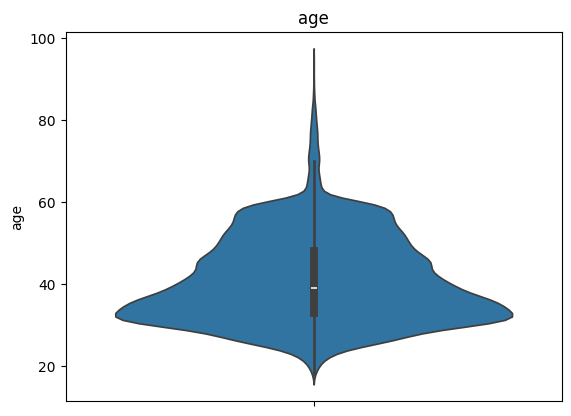

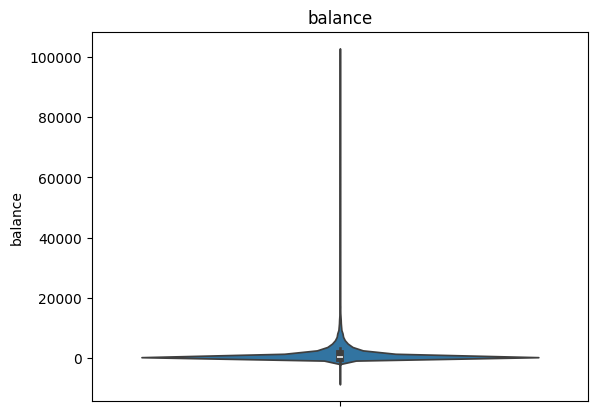

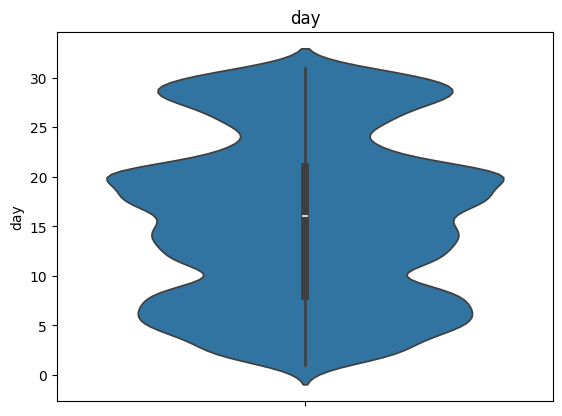

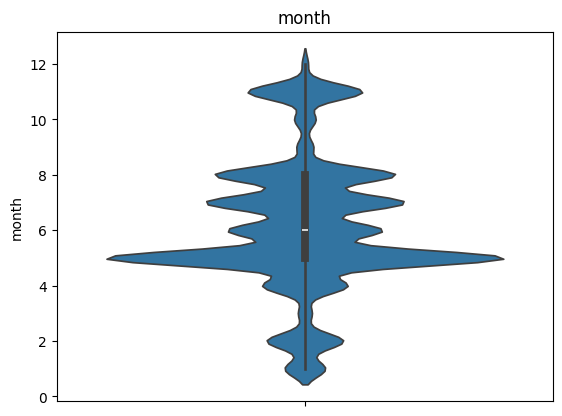

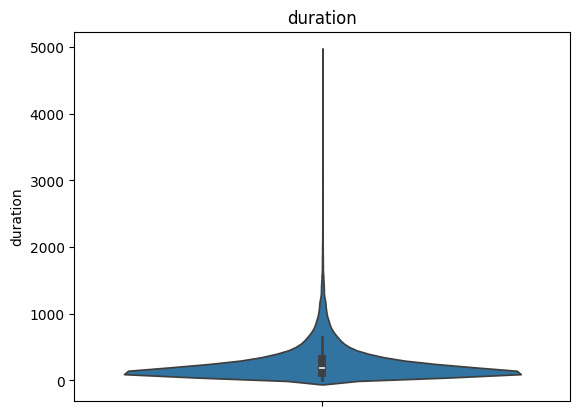

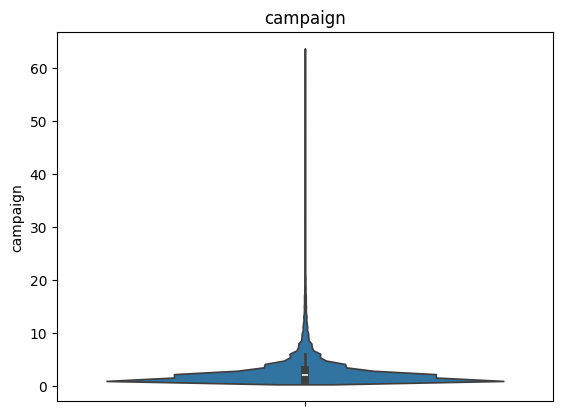

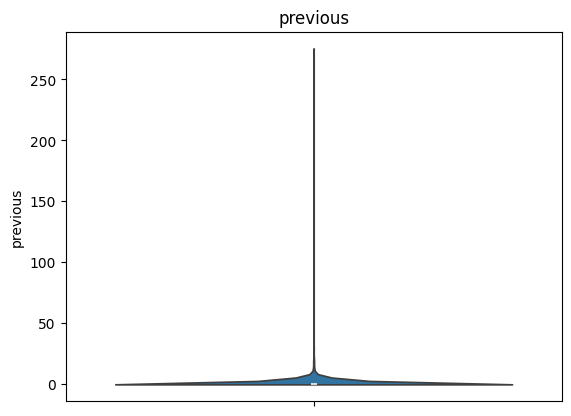

In [17]:
# Realizar diagrama de violin de todas las variables que no sean binarias
for i in data.columns:
    if i not in binary_vars:
        sns.violinplot(data[i])
        plt.title(i)
        plt.show()

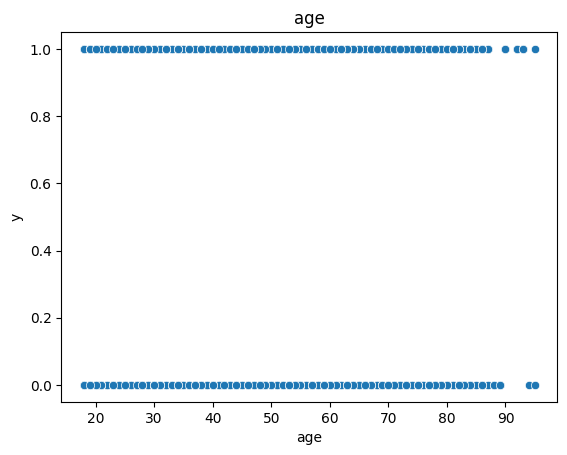

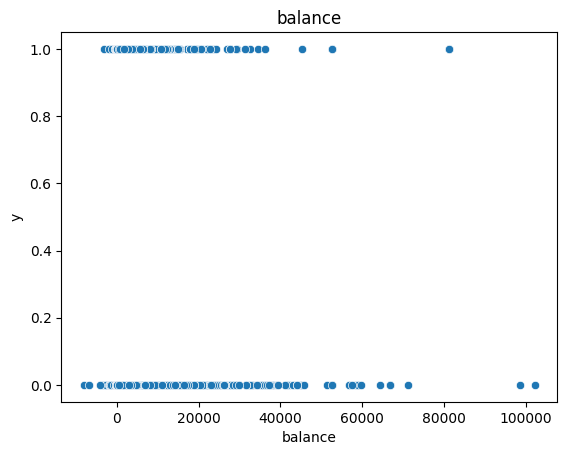

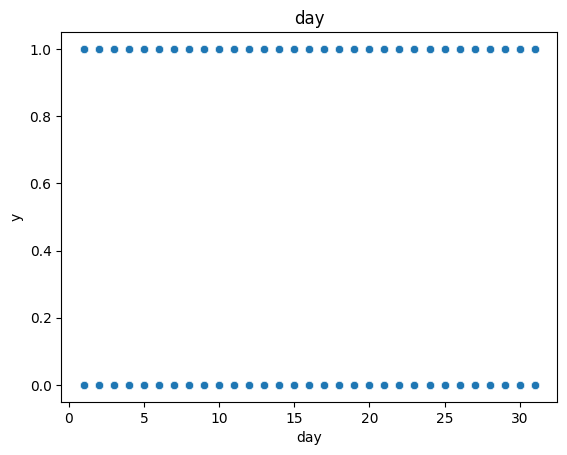

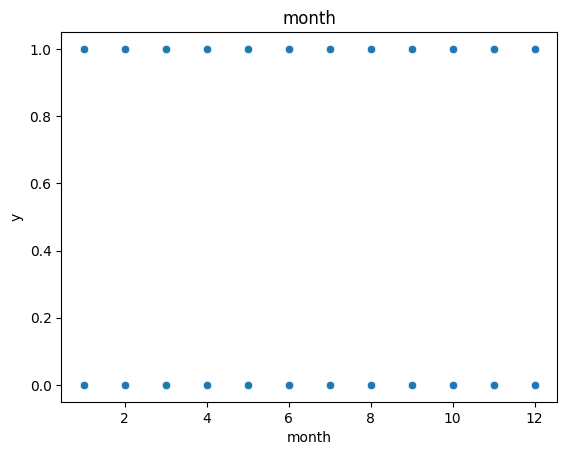

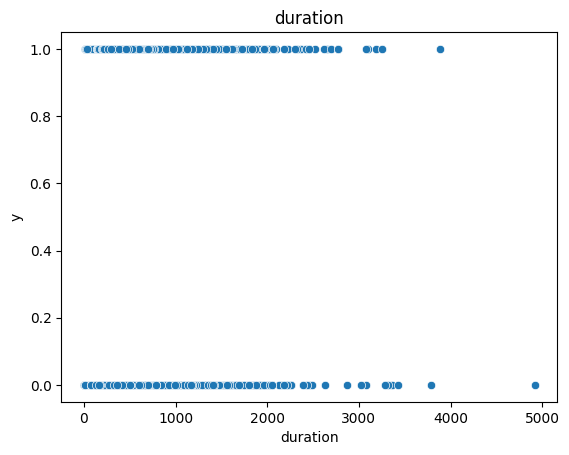

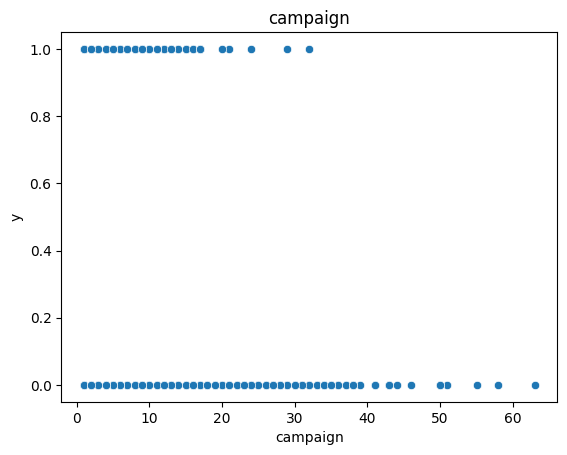

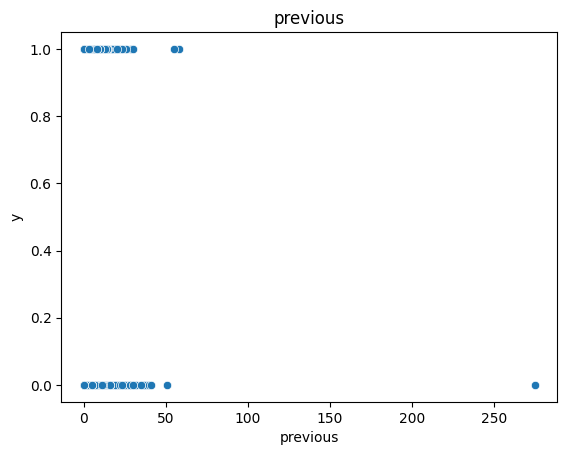

In [22]:
# Realizar diagramas de dispersion de todas las variables que no sean binarias
for i in data.columns: 
    if i not in binary_vars:
        sns.scatterplot(x=data[i], y=data["y"])
        plt.title(i)
        plt.show()

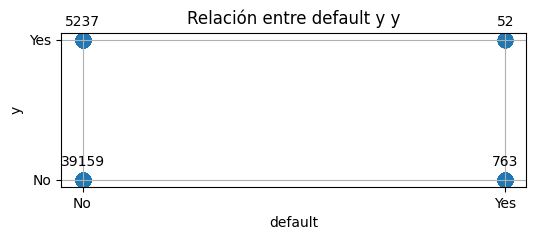

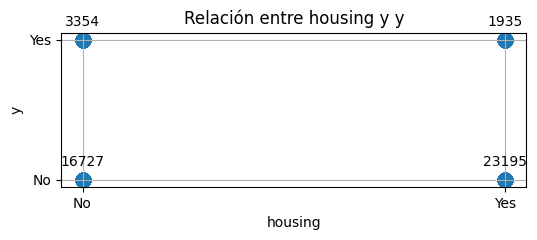

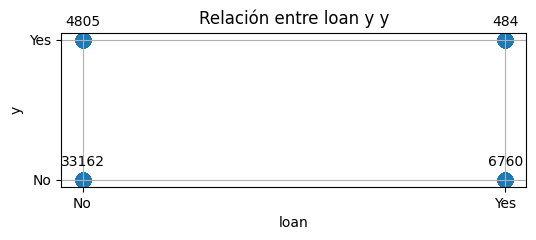

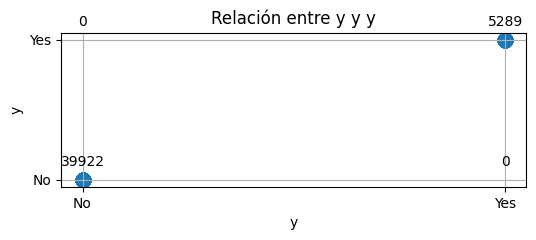

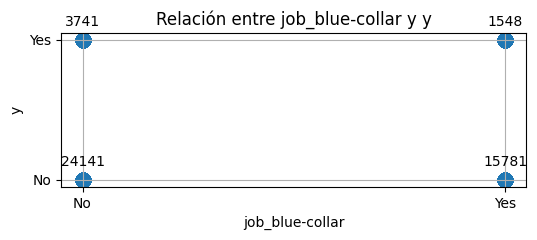

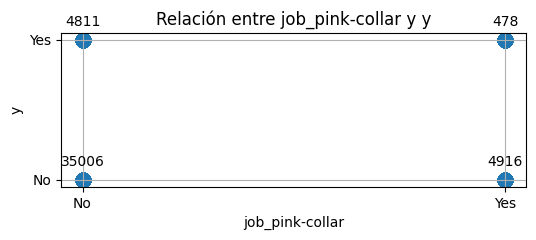

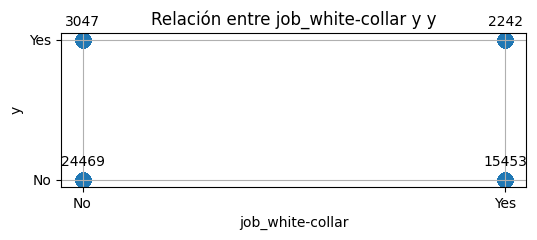

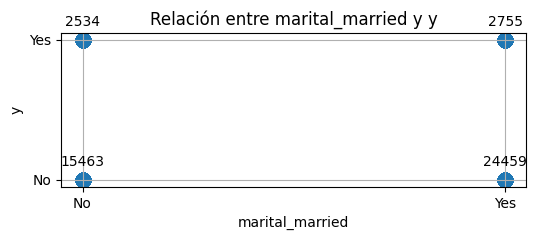

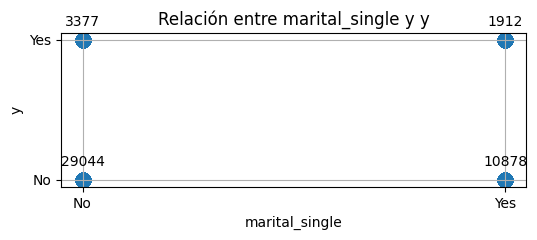

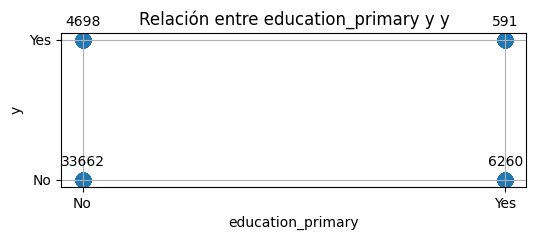

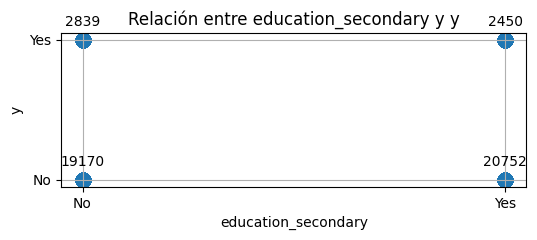

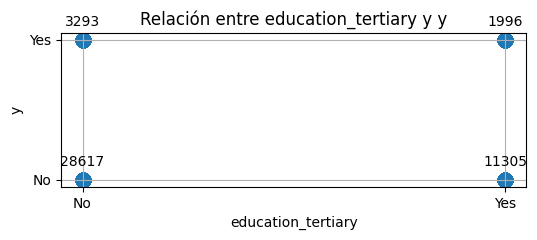

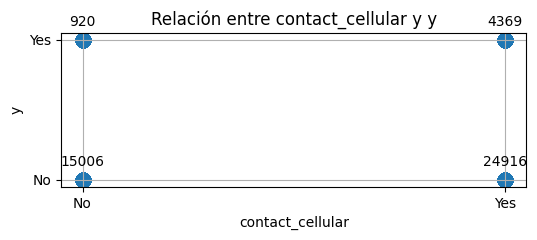

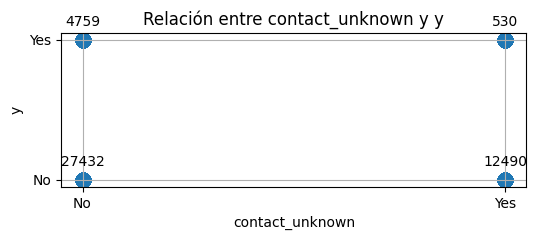

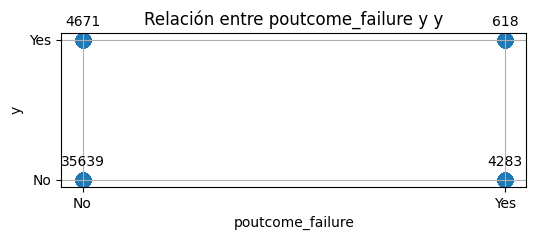

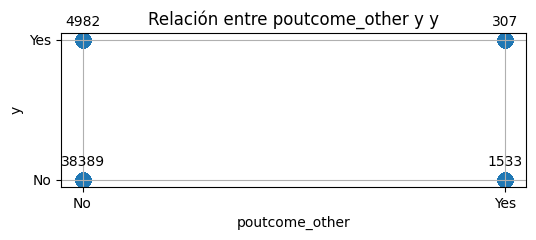

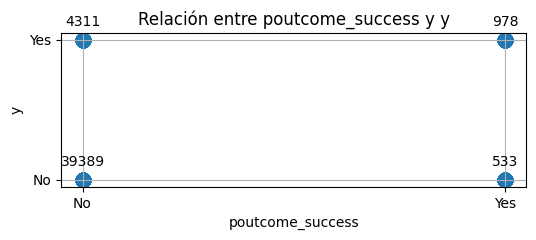

In [26]:
# Crear el diagrama de dispersión para las variables binarias
for var in binary_vars:
    if var in data.columns:
        plt.figure(figsize=(6, 2))
        plt.scatter(data[var], data['y'], alpha=0.6, s=100)
        
        # Etiquetas de los ejes
        plt.xlabel(var)
        plt.ylabel('y')
        
        # Personalización de ejes para una visualización más clara
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.yticks([0, 1], ['No', 'Yes'])
        
        # Título
        plt.title(f'Relación entre {var} y y')
        
        # Contar los puntos en cada intersección
        counts = data.groupby([var, 'y']).size().unstack(fill_value=0)
        for x in [0, 1]:
            for y in [0, 1]:
                plt.annotate(counts.loc[x, y], (x, y), textcoords="offset points", xytext=(0,10), ha='center')
        
        plt.grid(True)
        plt.show()

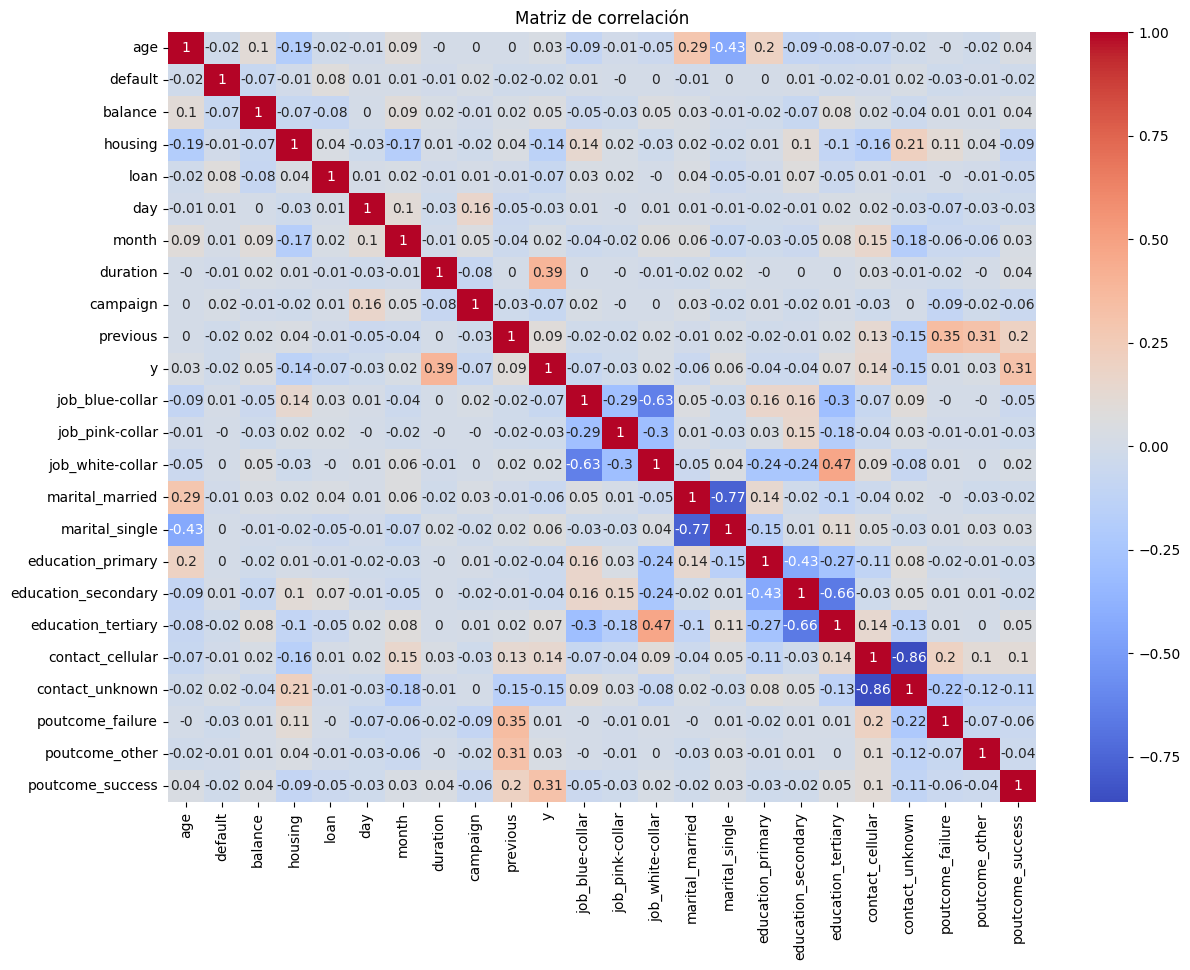

In [31]:
# Realizar matriz de correlación
plt.figure(figsize=(14, 10))
corr = data.corr().round(2)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Matriz de correlación')
plt.show()
